In [1]:
! pip install psycopg2-binary

import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Init de la connexion à la db 
conn = ps.connect(
    host="54.36.191.217",
    port="5432",
    dbname="postgres",
    user="postgres",
    password="epsi-test-abc")

In [3]:
# Fetch des datas
pdf = sqlio.read_sql_query("SELECT fk_annee as \"annees\", SUM(nb_criminalite) as nb_criminalite FROM mspr_ia.fait_nombre where nb_criminalite IS NOT NULL group by fk_annee order by fk_annee", conn)
pdf

C:\Users\allen\AppData\Local\Temp\ipykernel_18092\2571383423.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pdf = sqlio.read_sql_query("SELECT fk_annee as \"annees\", SUM(nb_criminalite) as nb_criminalite FROM mspr_ia.fait_nombre where nb_criminalite IS NOT NULL group by fk_annee order by fk_annee", conn)


annees  nb_criminalite
0     2000        421545.0
1     2001        447849.0
2     2002        458870.0
3     2003        445727.0
4     2004        428997.0
5     2005        423224.0
6     2006        418661.0
7     2007        393574.0
8     2008        397442.0
9     2009        394111.0
10    2010        382223.0
11    2011        379534.0
12    2012        386688.0
13    2013        399973.0
14    2014        408175.0
15    2015        417329.0
16    2016        423872.0
17    2017        429985.0
18    2018        432143.0
19    2019        442538.0
20    2020        391644.0
21    2021        434610.0
22    2022        306181.0

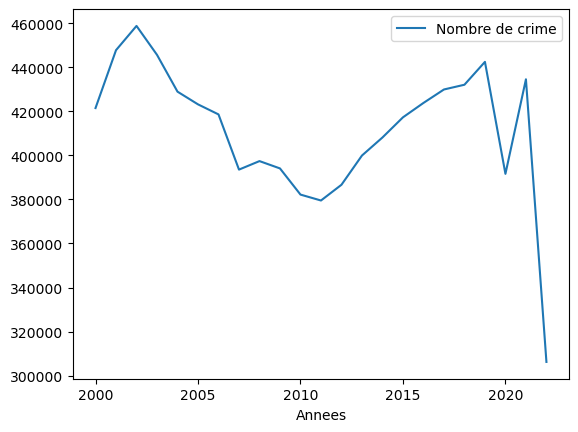

In [4]:
#Visualisation du df

x_data = pdf.annees
y_data1 = pdf.nb_criminalite

fig, ax = plt.subplots()
ax.plot(x_data, y_data1, label='Nombre de crime')
ax.set_xlabel('Annees')
ax.legend()
plt.show()

In [5]:
# Analyse statistique du dataset

pdf.describe()

annees  nb_criminalite
count    23.00000       23.000000
mean   2011.00000   411517.173913
std       6.78233    32143.822863
min    2000.00000   306181.000000
25%    2005.50000   393842.500000
50%    2011.00000   418661.000000
75%    2016.50000   431064.000000
max    2022.00000   458870.000000

In [11]:
# Le jeu de données semble assez propre et ne semble pas contenir d'outlayers
# Regression linéaire pour afin de mettre en relation variable de criminalité et de nombre de vote

# Recuperation du nombre de vote par annee du premier parti de notre echantillon

nb_votes_com= sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'COM' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)

nb_votes_com

C:\Users\allen\AppData\Local\Temp\ipykernel_18092\3305465063.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nb_votes_exd = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'COM' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)


annees  nb_total_vote partis
0     1958          90429    COM
1     1962          89129    COM
2     1967         119713    COM
3     1973         112165    COM
4     1978         122020    COM
5     1981          74453    COM
6     1988          54271    COM
7     1993          43948    COM
8     1997          54502    COM
9     2002          17170    COM
10    2007          25175    COM
11    2012            290    COM
12    2017          83259    COM
13    2022          83259    COM

In [12]:
# Jointure des deux dataframes
final_pdf_com = pd.merge(pdf, nb_votes_com, on="annees")
final_pdf_com

annees  nb_criminalite  nb_total_vote partis
0    2002        458870.0          17170    COM
1    2007        393574.0          25175    COM
2    2012        386688.0            290    COM
3    2017        429985.0          83259    COM
4    2022        306181.0          83259    COM

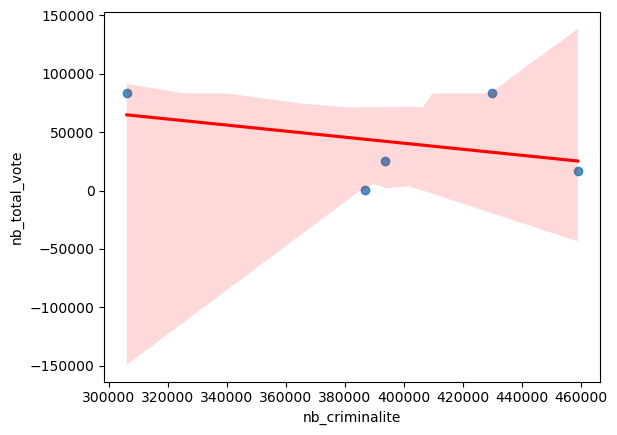

In [13]:
# Regression linéaire : 
ax = sns.regplot(x="nb_criminalite",y="nb_total_vote", data=final_pdf_com, line_kws={"color": "red"})

In [14]:

nb_votes_exd= sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'EXD' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)

nb_votes_exd

C:\Users\allen\AppData\Local\Temp\ipykernel_18092\596889299.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nb_votes_exd= sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'EXD' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)


annees  nb_total_vote partis
0     1958           1621    EXD
1     1962              0    EXD
2     1967              0    EXD
3     1973           3880    EXD
4     1978           5760    EXD
5     1981           2981    EXD
6     1988            310    EXD
7     1993           1040    EXD
8     1997           2222    EXD
9     2002           7387    EXD
10    2007           1519    EXD
11    2017           1764    EXD
12    2022           1764    EXD

In [15]:
# Jointure des deux dataframes
final_pdf_exd = pd.merge(pdf, nb_votes_exd, on="annees")
final_pdf_exd

annees  nb_criminalite  nb_total_vote partis
0    2002        458870.0           7387    EXD
1    2007        393574.0           1519    EXD
2    2017        429985.0           1764    EXD
3    2022        306181.0           1764    EXD

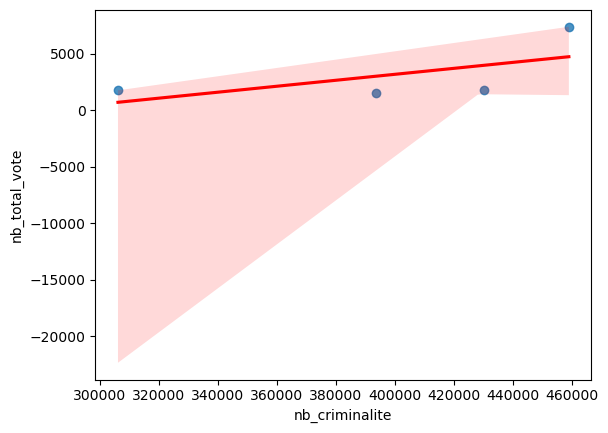

In [16]:
# Regression linéaire : 
ax = sns.regplot(x="nb_criminalite",y="nb_total_vote", data=final_pdf_exd, line_kws={"color": "red"})

In [22]:
nb_votes_div = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'DIV' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)

nb_votes_div

C:\Users\allen\AppData\Local\Temp\ipykernel_18092\218303435.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nb_votes_div = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'DIV' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)


annees  nb_total_vote partis
0    1958           2235    DIV
1    1962           1121    DIV
2    1967              0    DIV
3    1993          16243    DIV
4    1997           6029    DIV
5    2002          16452    DIV
6    2007           3800    DIV
7    2012           1875    DIV
8    2017          57480    DIV
9    2022          57480    DIV

In [23]:
final_pdf_div = pd.merge(pdf, nb_votes_div, on="annees")
final_pdf_div

annees  nb_criminalite  nb_total_vote partis
0    2002        458870.0          16452    DIV
1    2007        393574.0           3800    DIV
2    2012        386688.0           1875    DIV
3    2017        429985.0          57480    DIV
4    2022        306181.0          57480    DIV

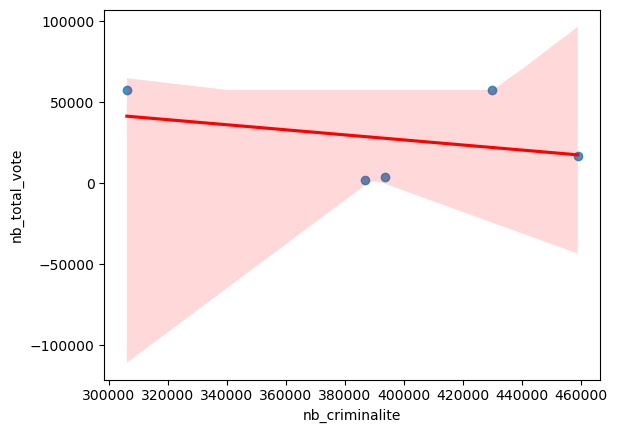

In [25]:
# Regression linéaire : 
ax = sns.regplot(x="nb_criminalite",y="nb_total_vote", data=final_pdf_div, line_kws={"color": "red"})

In [ ]:
# Constate donc que l'on peut trouver une corrélation pour l'extreme droite mais pas trop pour les autres